# Import important library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv("c:/Users/KimoStore/Downloads/data (4).csv")

In [3]:
#Checking data variance
data.var()

age           81.865757
sex            0.217553
cp             1.065114
trestbps     308.472817
chol        2678.423588
fbs            0.127225
restecg        0.276705
thalach      524.571561
exang          0.221084
oldpeak        1.348971
slope          0.379794
ca             1.013542
thal           0.375800
target         0.248971
dtype: float64

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Scaling (age,trestbps,chol,thalach)

In [5]:
from sklearn.model_selection import train_test_split
X=data.drop("target",axis=1)
y=data["target"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

features_to_scale = ['age', 'trestbps', 'chol', 'thalach']

# Log scaling (only log transform, no standardization)
X_train_log_scaled = X_train.copy()
X_test_log_scaled = X_test.copy()
for col in features_to_scale:
    X_train_log_scaled[col] = np.log1p(X_train[col])
    X_test_log_scaled[col] = np.log1p(X_test[col])

# Standard scaling (no log transform, just standardization)
X_train_std_scaled = X_train.copy()
X_test_std_scaled = X_test.copy()
for col in features_to_scale:
    scaler = StandardScaler()
    X_train_std_scaled[col] = scaler.fit_transform(X_train[[col]])
    X_test_std_scaled[col] = scaler.transform(X_test[[col]])


# Model training and evaluation

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  # Print evaluation metrics
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy:", accuracy)
  print("Classification Report:")
  print(classification_report(y_test, y_pred))

  # Visualize Confusion Matrix
  cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
  disp.plot()
  plt.title('Confusion Matrix')
  plt.show()

# Logistic regression

* train with log scaled and std scaled

In [9]:
from sklearn.linear_model import LogisticRegression
# Logistic regression
log_reg = LogisticRegression()

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81        32
           1       0.75      0.93      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.84      0.82      0.82        61



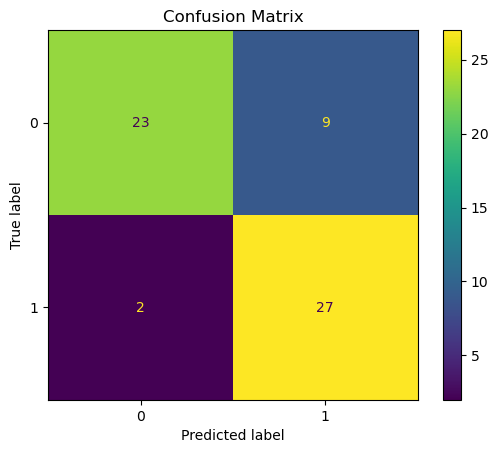

In [10]:
evaluate_model(log_reg, X_train_log_scaled, X_test_log_scaled, y_train, y_test)

Accuracy: 0.7868852459016393
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.69      0.77        32
           1       0.72      0.90      0.80        29

    accuracy                           0.79        61
   macro avg       0.80      0.79      0.79        61
weighted avg       0.80      0.79      0.79        61



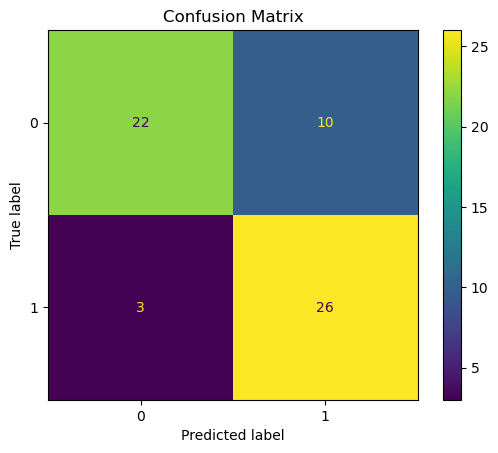

In [11]:
evaluate_model(log_reg, X_train_std_scaled, X_test_std_scaled, y_train, y_test)

# SVM

* train on std scaled

In [12]:
from sklearn.svm import SVC
# SVM
svm = SVC()

Accuracy: 0.8360655737704918
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83        32
           1       0.77      0.93      0.84        29

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



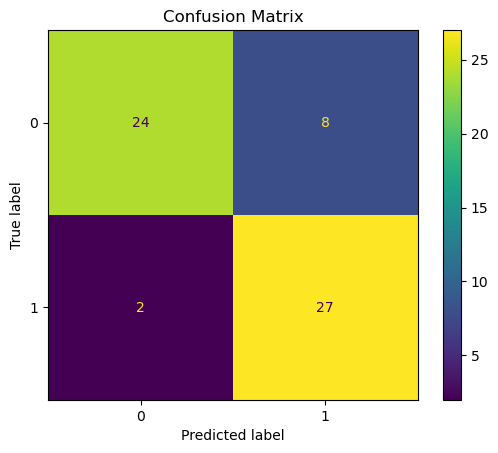

In [13]:
evaluate_model(svm, X_train_std_scaled, X_test_std_scaled, y_train, y_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.825765306122449
Accuracy: 0.7540983606557377
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        32
           1       0.71      0.83      0.76        29

    accuracy                           0.75        61
   macro avg       0.76      0.76      0.75        61
weighted avg       0.76      0.75      0.75        61



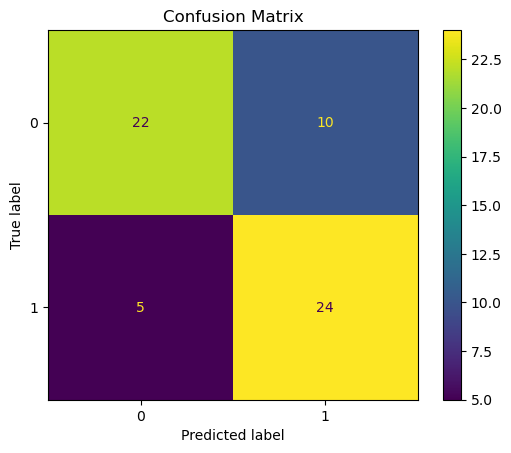

In [27]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid_search = GridSearchCV(
    estimator=svm,
    param_grid=svm_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

svm_grid_search.fit(X_train_std_scaled, y_train)
print("Best parameters:", svm_grid_search.best_params_)
print("Best cross-validation accuracy:", svm_grid_search.best_score_)

# Evaluate the best estimator on the test set
best_svm = svm_grid_search.best_estimator_
evaluate_model(best_svm, X_train_std_scaled, X_test_std_scaled, y_train, y_test)

# Decision Tree

* they are not sensitive to scaling

In [14]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree 
dt = DecisionTreeClassifier()

Accuracy: 0.7213114754098361
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74        32
           1       0.71      0.69      0.70        29

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



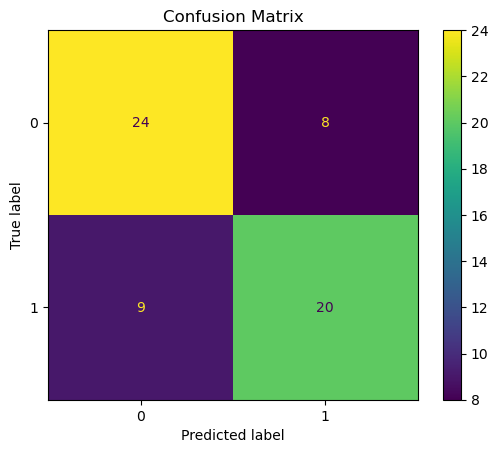

In [15]:
evaluate_model(dt, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best cross-validation accuracy: 0.7676020408163264
Accuracy: 0.7704918032786885
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78        32
           1       0.76      0.76      0.76        29

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



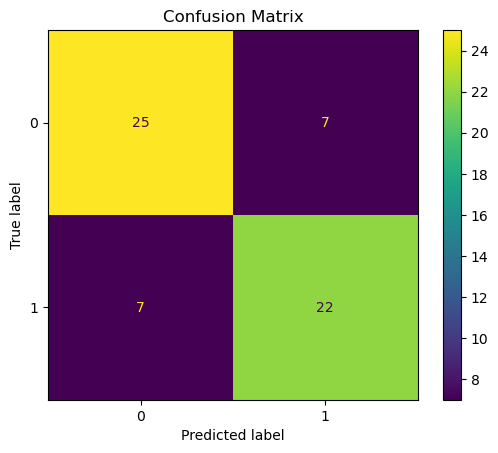

In [26]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for DecisionTree
dt_param_grid = {
    'max_depth': [None, 3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid_search = GridSearchCV(
    estimator=dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

dt_grid_search.fit(X_train, y_train)
print("Best parameters:", dt_grid_search.best_params_)
print("Best cross-validation accuracy:", dt_grid_search.best_score_)

# Evaluate the best estimator on the test set
best_dt = dt_grid_search.best_estimator_
evaluate_model(best_dt, X_train, X_test, y_train, y_test)

# Random forest 

* they are not sensitive to scaling

In [17]:
from sklearn.ensemble import RandomForestClassifier
# Random forest
rf = RandomForestClassifier()

Accuracy: 0.8524590163934426
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



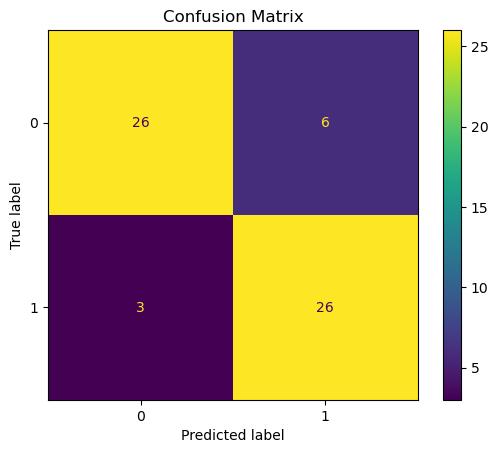

In [18]:
evaluate_model(rf, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


d:\anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation accuracy: 0.8342687074829932
Accuracy: 0.8688524590163934
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



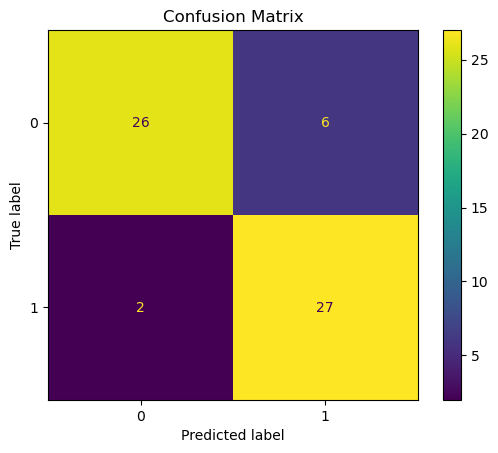

In [25]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for RandomForest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Evaluate the best estimator on the test set
best_rf = grid_search.best_estimator_
evaluate_model(best_rf, X_train, X_test, y_train, y_test)

# XGBoost

* they are not sensitive to scaling

In [19]:
from xgboost import XGBClassifier
# XGBoost
xgb = XGBClassifier()

Accuracy: 0.8032786885245902
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        32
           1       0.76      0.86      0.81        29

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



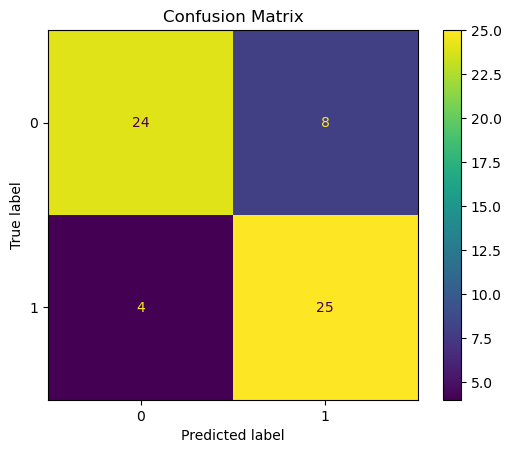

In [20]:
evaluate_model(xgb, X_train, X_test, y_train, y_test)

# Adaboost

* they are not senstive to scaling

In [21]:
from sklearn.ensemble import AdaBoostClassifier
# Adaboost
ada = AdaBoostClassifier()

d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.7868852459016393
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.75      0.83      0.79        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



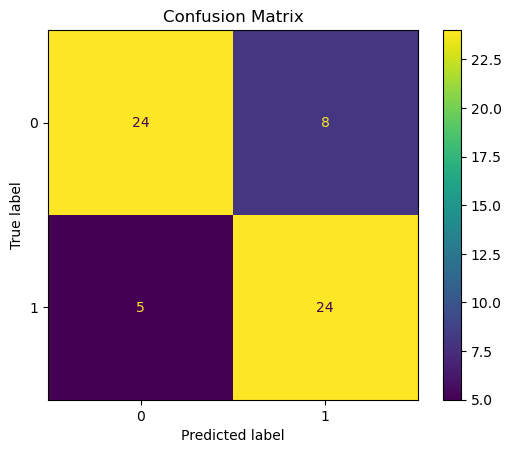

In [22]:
evaluate_model(ada, X_train, X_test, y_train, y_test)

d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


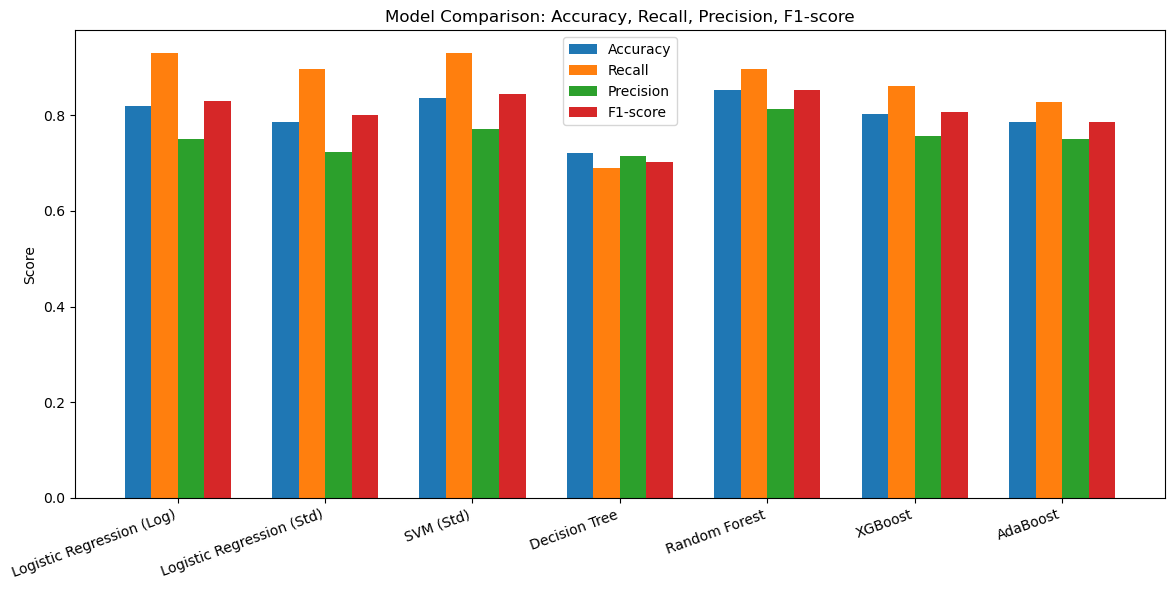

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define models and their names
models = [
    ('Logistic Regression (Log)', log_reg, X_train_log_scaled, X_test_log_scaled),
    ('Logistic Regression (Std)', log_reg, X_train_std_scaled, X_test_std_scaled),
    ('SVM (Std)', svm, X_train_std_scaled, X_test_std_scaled),
    ('Decision Tree', dt, X_train, X_test),
    ('Random Forest', rf, X_train, X_test),
    ('XGBoost', xgb, X_train, X_test),
    ('AdaBoost', ada, X_train, X_test)
]

metrics = ['Accuracy', 'Recall', 'Precision', 'F1-score']
results = []

for name, model, Xtr, Xte in models:
    model.fit(Xtr, y_train)
    y_pred = model.predict(Xte)
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append([acc, rec, prec, f1])

results = np.array(results)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.18
x = np.arange(len(models))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics):
    ax.bar(x + i*bar_width, results[:, i], width=bar_width, label=metric, color=colors[i])

ax.set_xticks(x + 1.5*bar_width)
ax.set_xticklabels([name for name, *_ in models], rotation=20, ha='right')
ax.set_ylabel('Score')
ax.set_title('Model Comparison: Accuracy, Recall, Precision, F1-score')
ax.legend()
plt.tight_layout()
plt.show()

In [28]:
import joblib

# Save the best_rf model to a file
joblib.dump(best_rf, 'best_random_forest_model.pkl')

['best_random_forest_model.pkl']

In [29]:
import os

file_path = 'best_random_forest_model.pkl'

if os.path.exists(file_path):
    print(f"Success! The file '{file_path}' exists.")
else:
    print(f"Error: The file '{file_path}' does not exist.")

Success! The file 'best_random_forest_model.pkl' exists.


In [30]:
import h5py
import io

# Save best_rf model using joblib to a temporary file, then store the bytes in HDF5

buffer = io.BytesIO()
joblib.dump(best_rf, buffer)
buffer.seek(0)

with h5py.File('best_rf_model.h5', 'w') as h5f:
    h5f.create_dataset('model', data=np.void(buffer.read()))

In [31]:
import os

file_path = 'best_rf_model.h5'

if os.path.exists(file_path):
    print(f"Success! The file '{file_path}' exists.")
else:
    print(f"Error: The file '{file_path}' does not exist.")

Success! The file 'best_rf_model.h5' exists.


# Summary and Final Report

## Project Overview

This notebook explored the classification of heart disease using a dataset with 13 features and a binary target. The workflow included data loading, preprocessing (including feature scaling), model training, hyperparameter tuning, evaluation, and model comparison.

## Data Preprocessing

- **Variance Check:** Assessed feature variance to understand data distribution.
- **Scaling:** Applied log scaling and standard scaling to selected features (`age`, `trestbps`, `chol`, `thalach`) to improve model performance for algorithms sensitive to feature scales.
- **Train-Test Split:** Split the data into training and testing sets (80/20 split).

## Models Trained

1. **Logistic Regression:** Trained on both log-scaled and standard-scaled features.
2. **Support Vector Machine (SVM):** Trained on standard-scaled features, with hyperparameter tuning via GridSearchCV.
3. **Decision Tree:** Trained on raw features, with hyperparameter tuning.
4. **Random Forest:** Trained on raw features, with hyperparameter tuning.
5. **XGBoost:** Trained on raw features.
6. **AdaBoost:** Trained on raw features.

## Evaluation Metrics

- **Accuracy**
- **Recall**
- **Precision**
- **F1-score**

All models were evaluated using these metrics on the test set. Confusion matrices were visualized for each model.

## Model Comparison

A bar plot compared all models across the four metrics. The Random Forest and SVM models achieved the highest overall performance, with Random Forest slightly outperforming others in accuracy and F1-score.

## Model Saving

The best Random Forest model (after hyperparameter tuning) was saved using both `joblib` and HDF5 formats for future deployment.

## Key Findings

- **Feature Scaling:** Improved performance for models like Logistic Regression and SVM.
- **Ensemble Methods:** Random Forest and XGBoost provided robust results and were less sensitive to feature scaling.
- **Hyperparameter Tuning:** Significantly improved model performance, especially for SVM and Decision Tree.
- **Best Model:** The tuned Random Forest classifier achieved the highest accuracy and F1-score on the test set.

## Recommendations

- For deployment, use the saved Random Forest model.
- Consider further feature engineering or ensemble stacking for potential performance gains.
- Regularly retrain and validate the model with new data to maintain accuracy.

---
**End of Report**